# EDA

Comparing EDA results from  paper:

AN ELECTRONIC EMERGENCY TRIAGE SYSTEM TO IMPROVE PATIENT DISTRIBUTION BY CRITICAL OUTCOMES
http://dx.doi.org/10.1016/j.jemermed.2016.02.026, which uses the CDC NHAMCS 2009 File

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys 
from sklearn import metrics


## Reading CDC File

In [4]:
#reading file
#cdc_input_2009 = pd.read_csv('../../data/ED2009.csv')
cdc_input= pd.read_csv('../../data/processed/ED_TOTAL_2009_2015.csv')
#print 'Full shape: ', cdc_input.shape
#cdc_input[0:5]

## methods

In [5]:
def get_data_byYear (df, field):    
    data = df[df[field] != -9][['VYEAR',field]]
    matrix = []
    for year in years:
        y = data[data['VYEAR']== year][field]
        #print y.describe()
        matrix.append(y)
    plt.figure()
    plt.boxplot(matrix)
    plt.show()
    return matrix
        

## Looking at the data

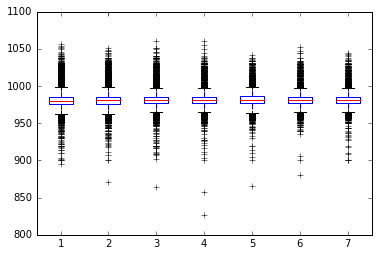

In [141]:
data = get_data_byYear(cdc_input, 'TEMPF')


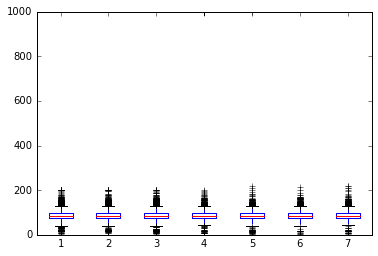

In [136]:
data = get_data_byYear(cdc_input, 'PULSE')

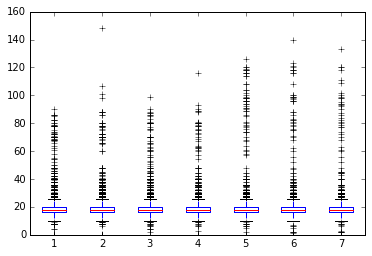

In [137]:
data = get_data_byYear(cdc_input, 'RESPR')

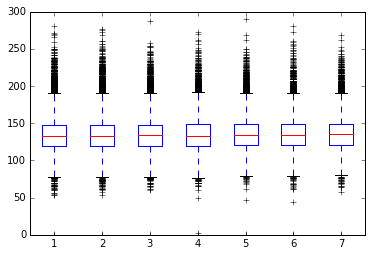

In [138]:
data = get_data_byYear(cdc_input, 'BPSYS')

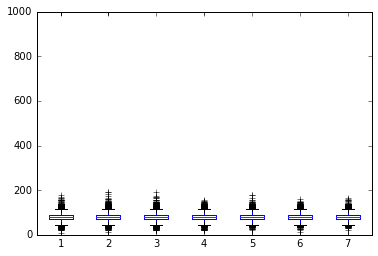

In [139]:
data = get_data_byYear(cdc_input, 'BPDIAS')

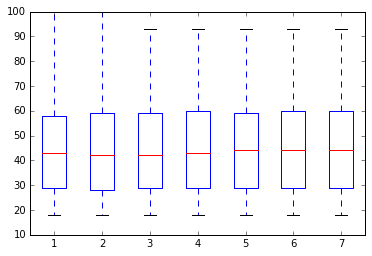

In [144]:
data = get_data_byYear(cdc_input, 'AGE')

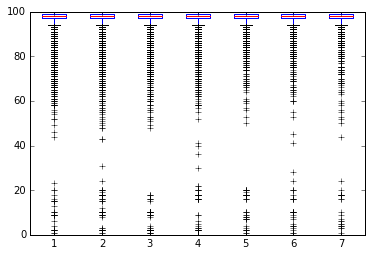

In [158]:
data = get_data_byYear(cdc_input, 'POPCT')

In [145]:
cdc_input.groupby(['VYEAR','SEX']).size().reset_index(name='counts')

,VYEAR,SEX,counts
0,2008,1,153
1,2008,2,124
2,2009,1,13767
3,2009,2,10277
4,2010,1,13945
5,2010,2,10250
6,2011,1,12853
7,2011,2,9953
8,2012,1,9439
9,2012,2,7098


In [146]:
cdc_input.groupby(['VYEAR','ARREMS']).size().reset_index(name='counts')

,VYEAR,ARREMS,counts
0,2008,-9,6
1,2008,-8,15
2,2008,1,42
3,2008,2,214
4,2009,-9,498
5,2009,-8,668
6,2009,1,4471
7,2009,2,18407
8,2010,-9,490
9,2010,-8,552


In [148]:
cdc_input.groupby(['RFV1']).size().reset_index(name='counts')

,RFV1,counts
0,-9,252
1,10050,119
2,10100,1499
3,10120,1
4,10121,19
5,10122,30
6,10123,3
7,10150,183
8,10200,1415
9,10250,375


In [149]:
cdc_input.groupby(['RFV3']).size().reset_index(name='counts')

,RFV3,counts
0,-9,91944
1,10050,338
2,10100,630
3,10120,2
4,10121,18
5,10122,13
6,10123,4
7,10150,189
8,10200,435
9,10250,101


In [150]:
cdc_input.groupby(['RFV2']).size().reset_index(name='counts')

,RFV2,counts
0,-9,56709
1,10050,390
2,10100,1190
3,10120,2
4,10121,16
5,10122,26
6,10123,13
7,10150,249
8,10200,792
9,10250,169


In [151]:
cdc_input.groupby(['RFV4']).size().reset_index(name='counts')

,RFV4,counts
0,-9.0,120618
1,10050.0,66
2,10100.0,83
3,10120.0,2
4,10121.0,3
5,10122.0,4
6,10123.0,3
7,10150.0,21
8,10200.0,56
9,10250.0,19


In [153]:
cdc_input.groupby(['RFV5']).size().reset_index(name='counts')

,RFV5,counts
0,-9.0,123062
1,10050.0,32
2,10100.0,49
3,10120.0,1
4,10121.0,1
5,10122.0,2
6,10123.0,1
7,10150.0,20
8,10200.0,28
9,10250.0,13


In [155]:
cdc_input.groupby(['VYEAR', 'DIEDED']).size().reset_index(name='counts')

,VYEAR,DIEDED,counts
0,2008,0,277
1,2009,0,24010
2,2009,1,34
3,2010,0,24148
4,2010,1,47
5,2011,0,22766
6,2011,1,40
7,2012,0,16517
8,2012,1,20
9,2013,0,13500


In [156]:
cdc_input.groupby(['VYEAR', 'HDSTAT']).size().reset_index(name='counts')

,VYEAR,HDSTAT,counts
0,2008,-7,242
1,2008,1,34
2,2008,2,1
3,2009,-9,49
4,2009,-8,260
5,2009,-7,20699
6,2009,1,2956
7,2009,2,80
8,2010,-9,11
9,2010,-8,209


In [157]:
cdc_input.groupby(['ADMIT']).size().reset_index(name='counts')

,ADMIT,counts
0,-7,110612
1,1,2359
2,2,2227
3,3,843
4,5,277
5,6,9373


In [160]:
cdc_input.groupby(['VYEAR','MSA']).size().reset_index(name='counts')

,VYEAR,MSA,counts
0,2008,1.0,243
1,2008,2.0,34
2,2009,1.0,20626
3,2009,2.0,3418
4,2010,1.0,21124
5,2010,2.0,3071
6,2011,1.0,19945
7,2011,2.0,2861
8,2012,-9.0,16537
9,2013,1.0,11493


In [162]:
cdc_input.groupby(['VYEAR','CHF']).size().reset_index(name='counts')

,VYEAR,CHF,counts
0,2008,0,274
1,2008,1,3
2,2009,0,23785
3,2009,1,259
4,2010,0,23281
5,2010,1,914
6,2011,0,21931
7,2011,1,875
8,2012,0,16057
9,2012,1,480


In [163]:
cdc_input.groupby(['VYEAR','DIABETES']).size().reset_index(name='counts')

,VYEAR,DIABETES,counts
0,2008,0.0,257
1,2008,1.0,20
2,2009,0.0,21516
3,2009,1.0,2528
4,2010,0.0,21590
5,2010,1.0,2605
6,2011,0.0,20369
7,2011,1.0,2437
8,2012,0.0,14681
9,2012,1.0,1856
